# data analysis

In [28]:
import pandas as pd
df=pd.read_csv('TexasTurbine.csv')
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

In [30]:
df.shape

(8760, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [32]:
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')

In [33]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,Jan 01 00:00:00.000000,1766.64,9.926,128,1.000480,18.263
1,Jan 01 01:00:00.000000,1433.83,9.273,135,0.999790,18.363
2,Jan 01 02:00:00.000000,1167.23,8.660,142,0.999592,18.663
3,Jan 01 03:00:00.000000,1524.59,9.461,148,0.998309,18.763
4,Jan 01 04:00:00.000000,1384.28,9.184,150,0.998507,18.963


In [34]:
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


In [36]:
df.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.describe().round(2)

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
count,8760.00,8760.00,8760.00,8760.00,8760.00
mean,964.47,7.38,146.62,0.99,22.15
std,878.56,3.14,84.68,0.01,4.86
min,0.00,0.12,0.00,0.97,3.26
25%,215.95,5.12,99.00,0.99,19.46
50%,693.97,7.34,135.00,0.99,22.76
75%,1562.29,9.60,169.00,1.00,26.06
max,3004.01,19.74,360.00,1.01,32.96


In [39]:
df["Month"]=df["Time stamp"].dt.month

In [13]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
 6   Month                          8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 479.2 KB


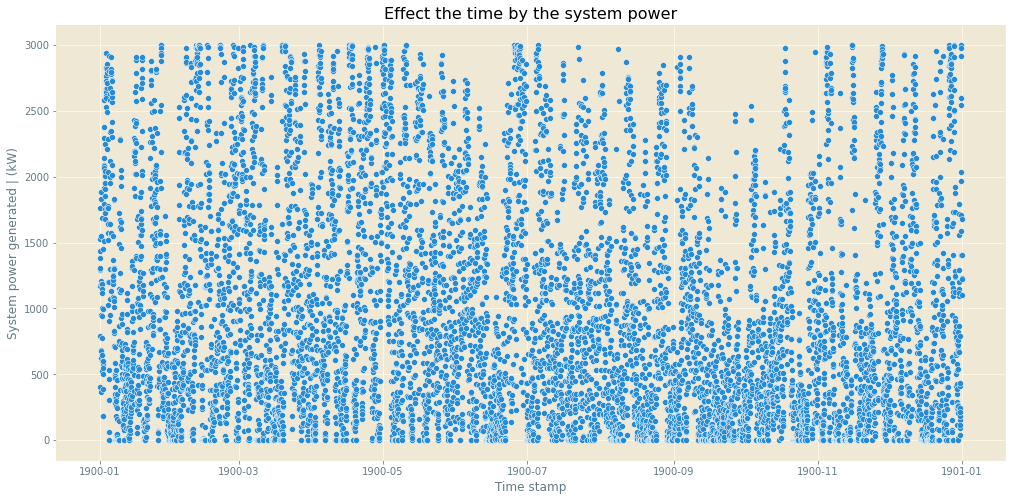

In [14]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="System power generated | (kW)",)
plt.title("Effect the time by the system power")
plt.show()

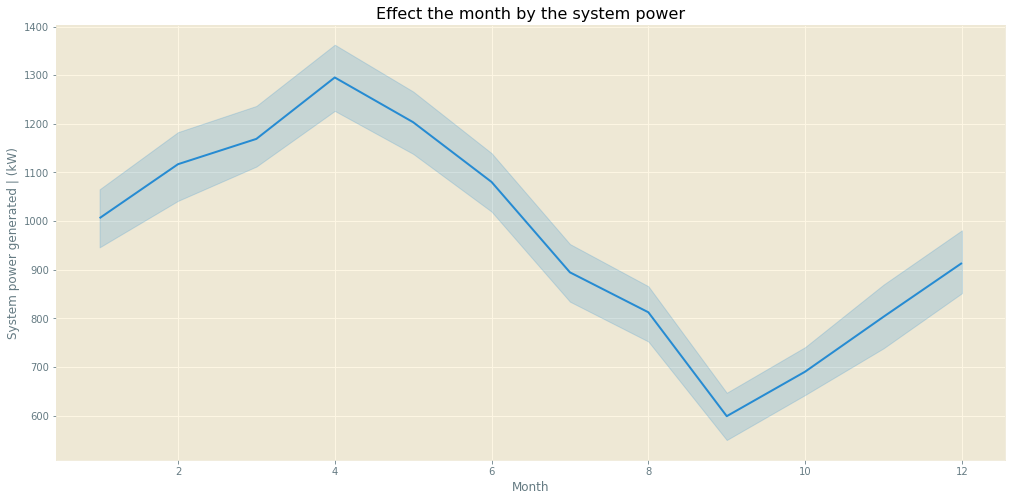

In [15]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="System power generated | (kW)",)
plt.title("Effect the month by the system power")
plt.show()

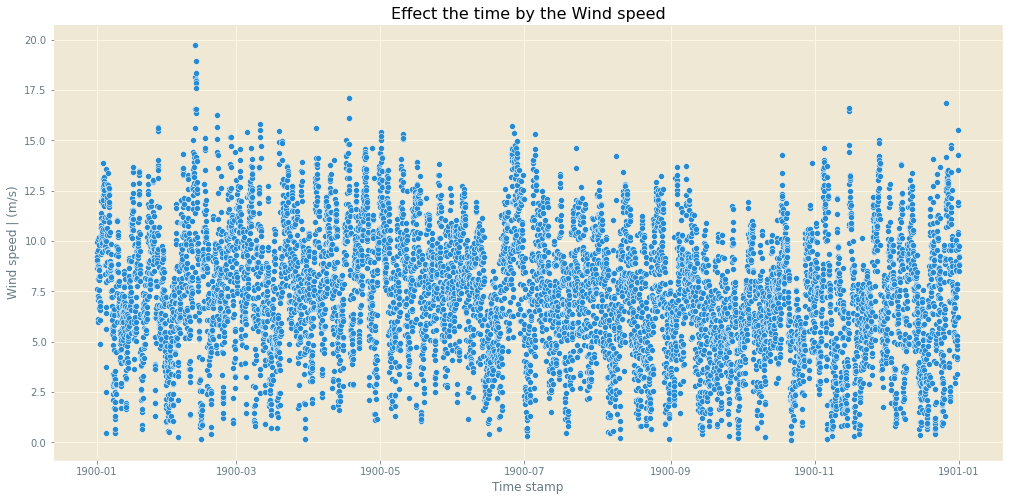

In [16]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind speed | (m/s)",)
plt.title("Effect the time by the Wind speed")
plt.show()

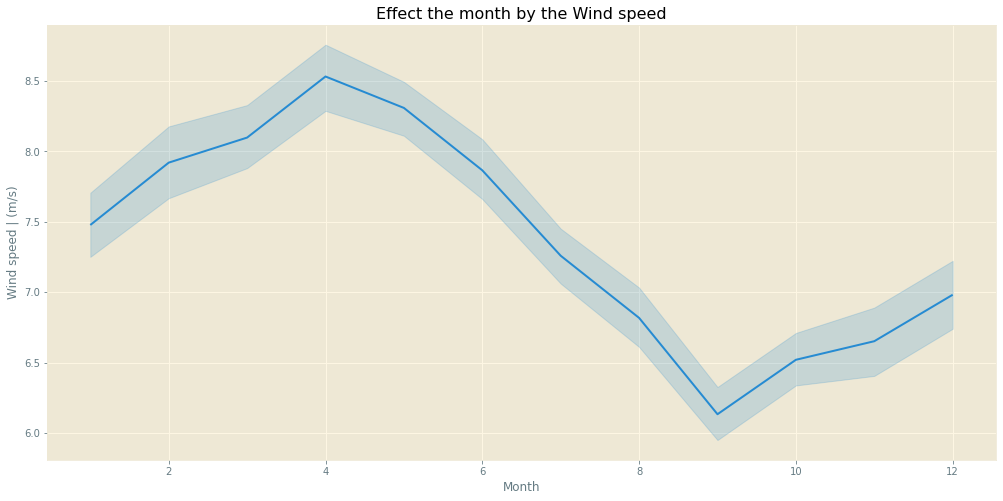

In [17]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind speed | (m/s)")
plt.title("Effect the month by the Wind speed")
plt.show()

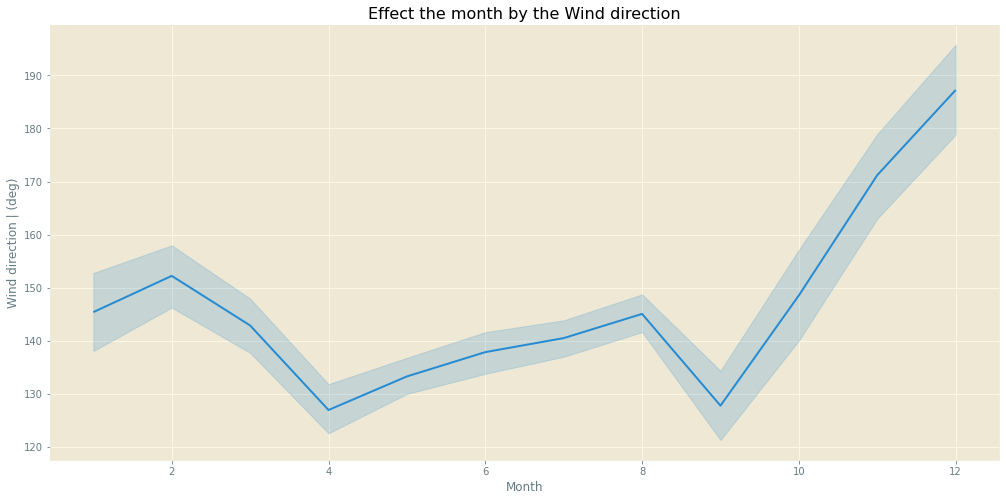

In [18]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind direction | (deg)",)
plt.title("Effect the month by the Wind direction")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
df.set_index("Time stamp",inplace=True)

In [21]:
df.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,,
1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


In [22]:
X = df.drop(columns="System power generated | (kW)")           
y = df["System power generated | (kW)"]    # y = system power generated 

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (6132, 5)
X Test  :  (2628, 5)
Y Train :  (6132,)
Y Test  :  (2628,)


In [23]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()
SVR = SVR()

In [24]:
li = [LR,DTR,RFR,KNR,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 91.15180354603353
DecisionTreeRegressor() : 99.98804295655673
RandomForestRegressor() : 99.99591372768043
KNeighborsRegressor() : 93.4547729570837
KNeighborsRegressor() : 93.4547729570837
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 99.9964483075646
SVR() : -6.190233934681544


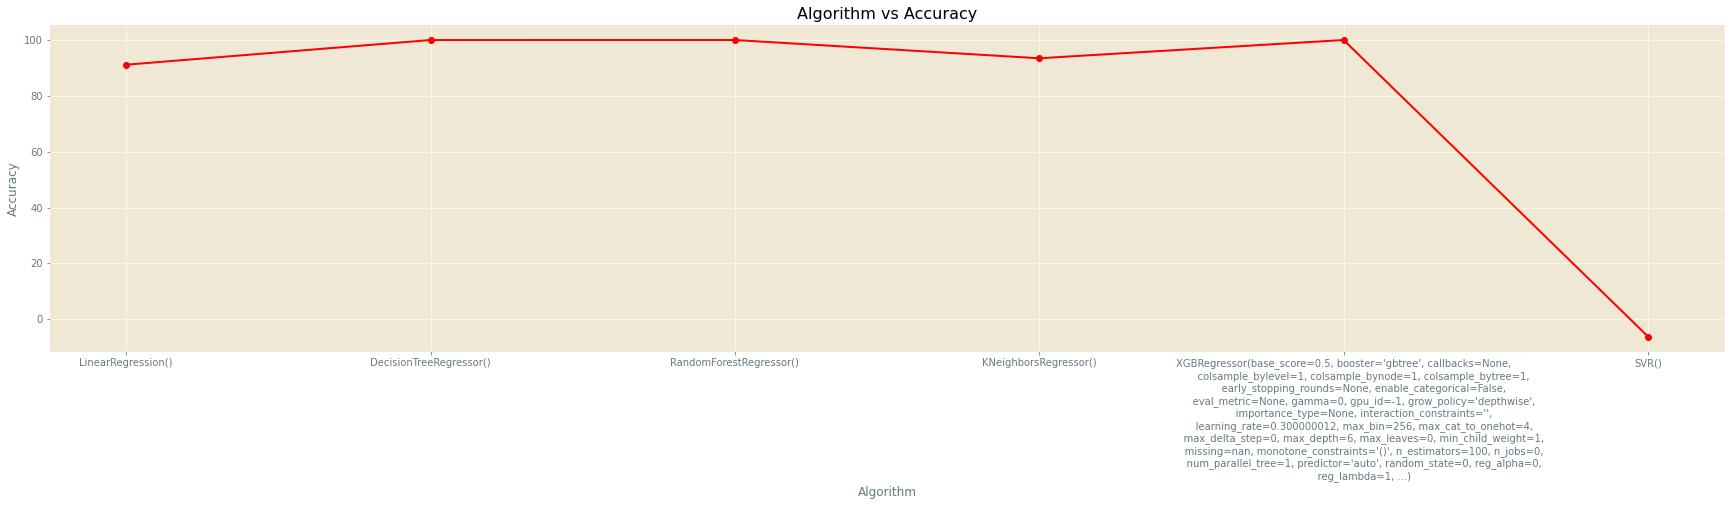

In [25]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

In [26]:
ypred_xgb=XGB.predict(X_test)

In [90]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,ypred_xgb))

5.148722153430591

In [27]:
import pickle 
pickle.dump(XGB,open('model.pkl','wb'))

# LSTM

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
df1=df.reset_index()['System power generated | (kW)']

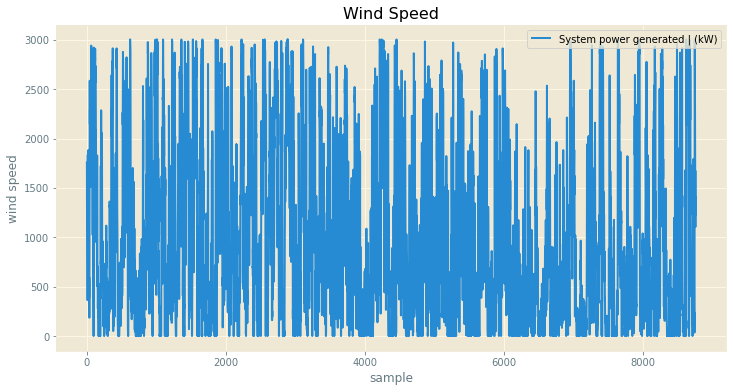

In [6]:
ax = df1.plot(figsize = (12,6), title= "Wind Speed" , legend = True)
ax.set(xlabel="sample", ylabel="wind speed")
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [9]:
training_size,test_size

(5694, 3066)

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(5688, 5)
(5688,)


(None, None)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='sgd')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 5, 32)             8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [16]:
import tensorflow as tf

In [17]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=3
)

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 8s 27ms/step - loss: 0.1025 - val_loss: 0.0775
Epoch 2/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0860 - val_loss: 0.0782
Epoch 3/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0852 - val_loss: 0.0780
Epoch 4/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0844 - val_loss: 0.0752
Epoch 5/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0835 - val_loss: 0.0754
Epoch 6/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0826 - val_loss: 0.0742
Epoch 7/100
89/89 [==============================] - 1s 11ms/step - loss: 0.0816 - val_loss: 0.0726
Epoch 8/100
89/89 [==============================] - 1s 11ms/step - loss: 0.0806 - val_loss: 0.0717
Epoch 9/100
89/89 [==============================] - 1s 10ms/step - loss: 0.0795 - val_loss: 0.0714
Epoch 10/100
89/89 [==============================] - 1s 9ms/step - loss: 0.0783 - val_loss: 0.0713


In [19]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

96/96 [==============================] - 0s 3ms/step


In [20]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
model.evaluate(X_test, ytest)

96/96 [==============================] - 0s 3ms/step - loss: 0.0307


0.030739907175302505

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1254.7226398358973

# LSTM

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [24]:
data = pd.read_csv("T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [26]:
data.shape

(50530, 5)

In [27]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [28]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


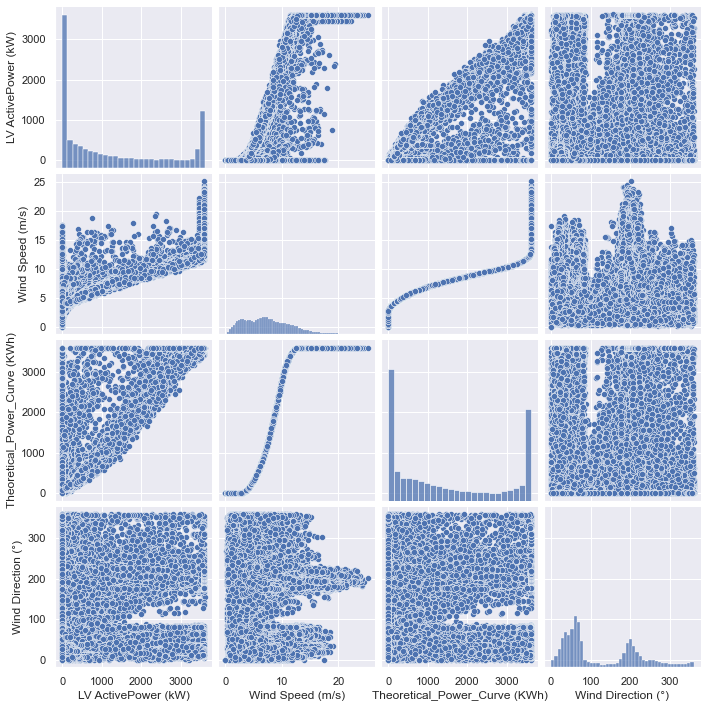

In [29]:
sns.pairplot(data)

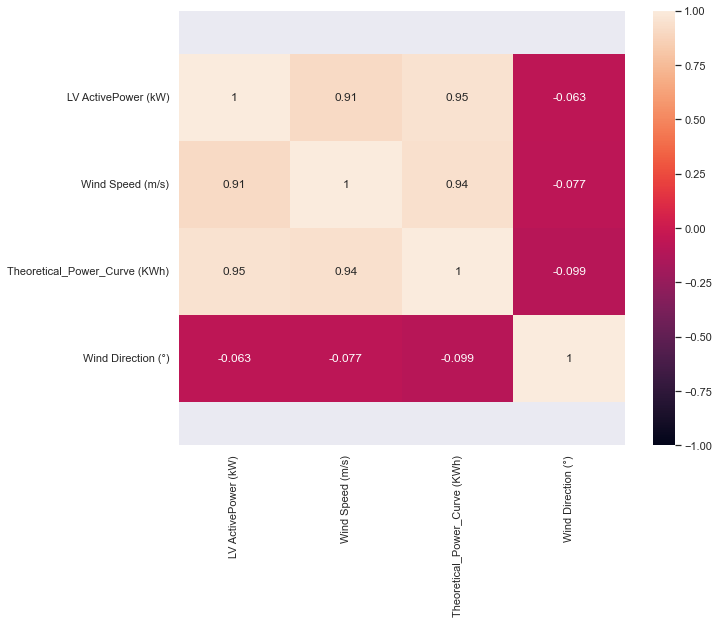

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [30]:
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [31]:
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


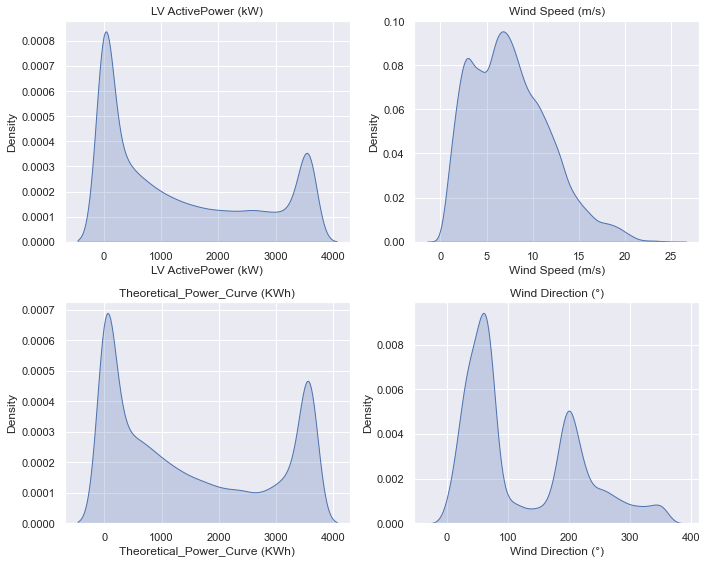

In [32]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [33]:
data = data.dropna()

In [34]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


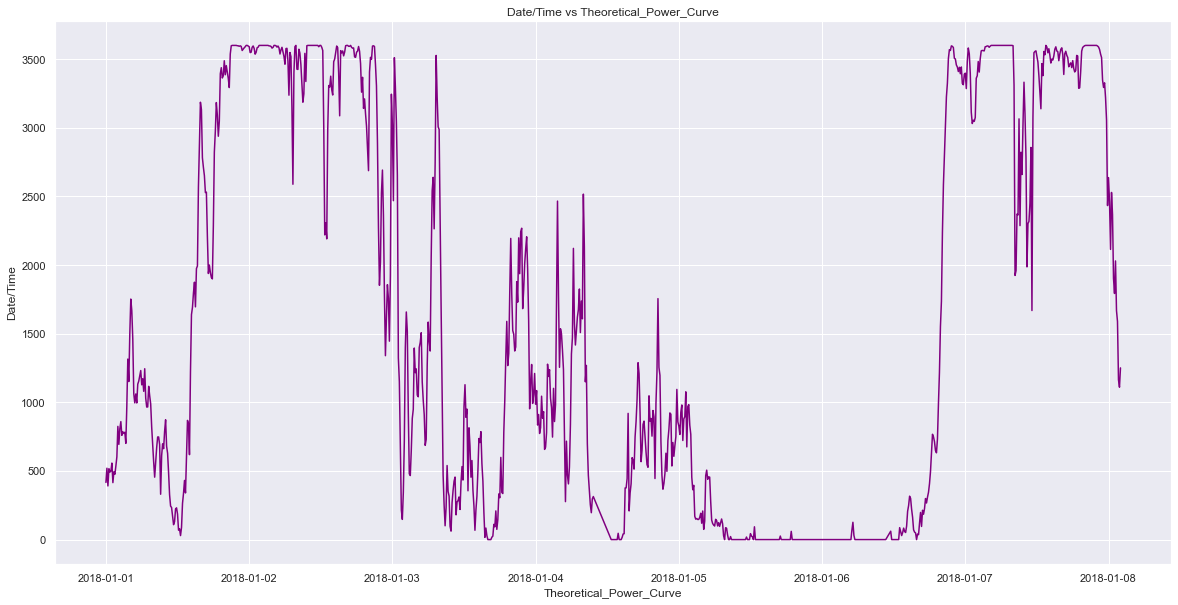

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [36]:
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [37]:
df = data.copy()

In [38]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

C:\Users\Abhimanyu\AppData\Local\Temp\ipykernel_15596\3577331749.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [39]:
df = df.set_index('Date/Time')

In [40]:
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [41]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [42]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [43]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [44]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [45]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [46]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [47]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [48]:
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [49]:
raw_values = df.values
diff_values = difference(raw_values, 1)

In [50]:
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [51]:
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [52]:
scaler, train_scaled, test_scaled = scale(train, test)

In [53]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49529/49529 [==============================] - 84s 2ms/step - loss: 0.0055


In [54]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 1s 1s/step
Hour=1, Predicted=3186.617838, Expected=3099.589351
1/1 [==============================] - 0s 8ms/step
Hour=2, Predicted=3075.837612, Expected=2288.732261
1/1 [==============================] - 0s 16ms/step
Hour=3, Predicted=2323.452997, Expected=2851.196746
1/1 [==============================] - 0s 16ms/step
Hour=4, Predicted=2846.283500, Expected=2285.016857
1/1 [==============================] - 0s 32ms/step
Hour=5, Predicted=2051.808010, Expected=1861.757477
1/1 [==============================] - 0s 47ms/step
Hour=6, Predicted=1977.220406, Expected=2366.628323
1/1 [==============================] - 0s 17ms/step
Hour=7, Predicted=2056.917269, Expected=1708.423896
1/1 [==============================] - 0s 15ms/step
Hour=8, Predicted=1684.731910, Expected=2470.838153
1/1 [==============================] - 0s 19ms/step
Hour=9, Predicted=2597.085172, Expected=1945.646150
1/1 [==============================] - 0s 3ms/step
Hour=10, Predict

1/1 [==============================] - 0s 18ms/step
Hour=157, Predicted=2128.472327, Expected=1498.471175
1/1 [==============================] - 0s 20ms/step
Hour=158, Predicted=1494.544832, Expected=2072.762765
1/1 [==============================] - 0s 26ms/step
Hour=159, Predicted=2068.836419, Expected=1555.808022
1/1 [==============================] - 0s 22ms/step
Hour=160, Predicted=1551.881674, Expected=2304.673182
1/1 [==============================] - 0s 25ms/step
Hour=161, Predicted=2300.746836, Expected=2914.007032
1/1 [==============================] - 0s 24ms/step
Hour=162, Predicted=2910.080681, Expected=1802.451426
1/1 [==============================] - 0s 42ms/step
Hour=163, Predicted=1798.525075, Expected=1521.620131
1/1 [==============================] - 0s 25ms/step
Hour=164, Predicted=1517.693779, Expected=1906.725720
1/1 [==============================] - 0s 21ms/step
Hour=165, Predicted=1902.799366, Expected=1160.393592
1/1 [==============================] - 0s 21ms

1/1 [==============================] - 0s 11ms/step
Hour=315, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 1ms/step
Hour=316, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 21ms/step
Hour=317, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 22ms/step
Hour=318, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 20ms/step
Hour=319, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=320, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=321, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=322, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=323, Predicted=-3.926351, Expected=39.921123
1/1 [==============================] - 0s 26ms/step
Hour=324, Predicted=35.994772, Expected

1/1 [==============================] - 0s 51ms/step
Hour=395, Predicted=52.256455, Expected=24.181788
1/1 [==============================] - 0s 16ms/step
Hour=396, Predicted=20.255437, Expected=32.571068
1/1 [==============================] - 0s 18ms/step
Hour=397, Predicted=28.644717, Expected=105.243480
1/1 [==============================] - 0s 18ms/step
Hour=398, Predicted=101.317129, Expected=98.601678
1/1 [==============================] - 0s 16ms/step
Hour=399, Predicted=94.675327, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=400, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=401, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=402, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=403, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=404, Predicted=-3.926351, Ex

1/1 [==============================] - 0s 15ms/step
Hour=476, Predicted=31.232162, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=477, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=478, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 22ms/step
Hour=479, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=480, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=481, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=482, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=483, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=484, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=485, Predicted=-3.926351, Expected

1/1 [==============================] - 0s 16ms/step
Hour=556, Predicted=324.658912, Expected=268.660948
1/1 [==============================] - 0s 17ms/step
Hour=557, Predicted=264.734597, Expected=220.860763
1/1 [==============================] - 0s 18ms/step
Hour=558, Predicted=216.934412, Expected=177.437066
1/1 [==============================] - 0s 21ms/step
Hour=559, Predicted=173.510715, Expected=167.387416
1/1 [==============================] - 0s 20ms/step
Hour=560, Predicted=163.461065, Expected=339.069515
1/1 [==============================] - 0s 17ms/step
Hour=561, Predicted=335.143165, Expected=411.463208
1/1 [==============================] - 0s 17ms/step
Hour=562, Predicted=407.536857, Expected=408.793378
1/1 [==============================] - 0s 16ms/step
Hour=563, Predicted=404.867028, Expected=337.530142
1/1 [==============================] - 0s 16ms/step
Hour=564, Predicted=333.603791, Expected=257.143353
1/1 [==============================] - 0s 15ms/step
Hour=565, Pr

Hour=712, Predicted=1892.319945, Expected=1434.984411
1/1 [==============================] - 0s 15ms/step
Hour=713, Predicted=1431.058060, Expected=1154.475058
1/1 [==============================] - 0s 15ms/step
Hour=714, Predicted=1150.548707, Expected=655.209080
1/1 [==============================] - 0s 16ms/step
Hour=715, Predicted=651.282729, Expected=558.581257
1/1 [==============================] - 0s 18ms/step
Hour=716, Predicted=554.654906, Expected=201.739075
1/1 [==============================] - 0s 15ms/step
Hour=717, Predicted=197.812724, Expected=601.527649
1/1 [==============================] - 0s 16ms/step
Hour=718, Predicted=597.601298, Expected=270.212330
1/1 [==============================] - 0s 16ms/step
Hour=719, Predicted=266.285980, Expected=791.459855
1/1 [==============================] - 0s 16ms/step
Hour=720, Predicted=787.533504, Expected=859.125871
1/1 [==============================] - 0s 16ms/step
Hour=721, Predicted=855.199520, Expected=779.117347
1/1 [==

1/1 [==============================] - 0s 19ms/step
Hour=793, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=794, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=795, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=796, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 20ms/step
Hour=797, Predicted=-3.926351, Expected=17.214579
1/1 [==============================] - 0s 19ms/step
Hour=798, Predicted=13.288229, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=799, Predicted=-3.926351, Expected=25.068110
1/1 [==============================] - 0s 16ms/step
Hour=800, Predicted=21.141759, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=801, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=802, Predicted=-3.926351, Expect

1/1 [==============================] - 0s 15ms/step
Hour=874, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=875, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=876, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=877, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=878, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=879, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=880, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=881, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=882, Predicted=-3.926351, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=883, Predicted=-3.926351, Expected

1/1 [==============================] - 0s 16ms/step
Hour=955, Predicted=1711.502668, Expected=1652.323671
1/1 [==============================] - 0s 16ms/step
Hour=956, Predicted=1648.397320, Expected=1905.087285
1/1 [==============================] - 0s 16ms/step
Hour=957, Predicted=1901.160934, Expected=1490.171275
1/1 [==============================] - 0s 14ms/step
Hour=958, Predicted=1486.244924, Expected=543.772723
1/1 [==============================] - 0s 16ms/step
Hour=959, Predicted=539.846373, Expected=293.979630
1/1 [==============================] - 0s 19ms/step
Hour=960, Predicted=290.053279, Expected=241.730240
1/1 [==============================] - 0s 16ms/step
Hour=961, Predicted=237.803889, Expected=286.671310
1/1 [==============================] - 0s 16ms/step
Hour=962, Predicted=282.744960, Expected=217.434880
1/1 [==============================] - 0s 16ms/step
Hour=963, Predicted=213.508530, Expected=243.534791
1/1 [==============================] - 0s 15ms/step
Hour=

In [55]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4574587086743633
